In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def smooth(scalars, weight=0.9):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

In [3]:
p_parent = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results/condition/random'
p_out_parent = '/Users/harveyaa/Documents/masters/neuropsych_mtl/MTL/results/condition/random'

In [4]:
cases = ['ASD',
        'SZ',
        'BIP',
        'DEL22q11_2',
        'DUP22q11_2',
        'DEL16p11_2',
        'DUP16p11_2',
        'DEL1q21_1',
        'DUP1q21_1']

In [5]:
sns.set_style('whitegrid')

# MLP - CONFOUNDS
## Single Task

In [6]:
res_single_conf = {}
for case in cases:
    p = os.path.join(p_parent,'confounds',f'{case}')
    folds = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[case]
        folds.append(df)
    res_single_conf[case] = folds

In [7]:
# INDIVIDUAL PLOTS
"""
for case in res_single_conf:
    fig,ax = plt.subplots(figsize=(10,3))
    plt.ylim(20,100)
    plt.xlim(0,100)
    for i,df in enumerate(res_single_conf[case]):
        sns.lineplot(x=df.index,y=smooth(df['Accuracy/test']),data=df,label=f'fold_{i}')
    plt.title(f'{case} - Confounds - Random Test Sets')
    plt.hlines(50,-5,105,ls='--',color='black')
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.savefig(os.path.join(p_out_parent,f'confounds/figures/{case}.png'),dpi=300)
    plt.show()
"""

'\nfor case in res_single_conf:\n    fig,ax = plt.subplots(figsize=(10,3))\n    plt.ylim(20,100)\n    plt.xlim(0,100)\n    for i,df in enumerate(res_single_conf[case]):\n        sns.lineplot(x=df.index,y=smooth(df[\'Accuracy/test\']),data=df,label=f\'fold_{i}\')\n    plt.title(f\'{case} - Confounds - Random Test Sets\')\n    plt.hlines(50,-5,105,ls=\'--\',color=\'black\')\n    plt.legend(loc="upper left")\n    plt.tight_layout()\n    plt.savefig(os.path.join(p_out_parent,f\'confounds/figures/{case}.png\'),dpi=300)\n    plt.show()\n'

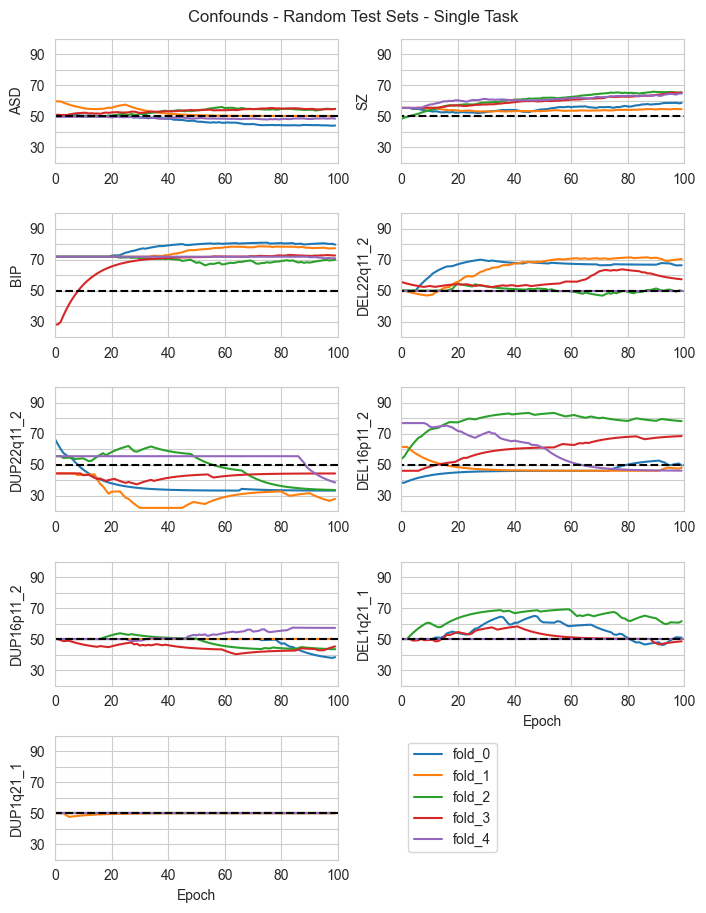

In [9]:
# TABLE PLOTS
fig,ax = plt.subplots(5,2,figsize=(7,9))
tuples = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1),(4,0)]
for j,case in enumerate(res_single_conf):
    for i,df in enumerate(res_single_conf[case]):
        sns.lineplot(x=df.index,y=smooth(df['Accuracy/test']),data=df,label=f'fold_{i}',ax=ax[tuples[j]])
    if j==0: 
        h, l = ax[tuples[j]].get_legend_handles_labels()
    ax[tuples[j]].get_legend().remove()
    ax[tuples[j]].set_ylabel(f'{case}')
    ax[tuples[j]].set_xlim(0,100)
    ax[tuples[j]].set_ylim(20,100)
    ax[tuples[j]].set_yticks([20,30,40,50,60,70,80,90,100])
    ax[tuples[j]].set_yticklabels([None,30,None,50,None,70,None,90,None])
    ax[tuples[j]].axhline(50,-5,105,ls='--',color='black')

    if (j == 8) | (j == 7):
        ax[tuples[j]].set_xlabel('Epoch')

ax[-1, -1].axis('off')
ax[-1,-1].legend(h, l,loc="upper left")
plt.suptitle('Confounds - Random Test Sets - Single Task',y=1)
plt.tight_layout(pad=0.5)
plt.savefig(os.path.join(p_out_parent,f'confounds/figures/ST_training.png'),dpi=300)
plt.show()

## Multi-Task

In [10]:
n_folds = 5

p = os.path.join(p_parent,'confounds/all')
folds_conf = []
for i in range(n_folds):
    p_fold = os.path.join(p,f'fold_{i}')
    file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
    df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])
    folds_conf.append(df)

In [11]:
# INDIVIDUAL PLOTS
"""
for i,df in enumerate(folds_conf):
    fig, ax = plt.subplots(figsize=(10,4))
    for case in cases:
        sns.lineplot(x=df.index,y=smooth(df[case]['Accuracy/test']),data=df[case],label=case)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Multi-Task - Confounds - Random Test Sets - Fold {i}')

    plt.xlim(0,100)
    plt.ylim(20,100)
    plt.hlines(50,-5,105,ls='--',color='black')
    plt.tight_layout()
    plt.savefig(os.path.join(p_out_parent,f'confounds/figures/all_fold{i}.png'))
    plt.show()
"""

'\nfor i,df in enumerate(folds_conf):\n    fig, ax = plt.subplots(figsize=(10,4))\n    for case in cases:\n        sns.lineplot(x=df.index,y=smooth(df[case][\'Accuracy/test\']),data=df[case],label=case)\n    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))\n    plt.title(f\'Multi-Task - Confounds - Random Test Sets - Fold {i}\')\n\n    plt.xlim(0,100)\n    plt.ylim(20,100)\n    plt.hlines(50,-5,105,ls=\'--\',color=\'black\')\n    plt.tight_layout()\n    plt.savefig(os.path.join(p_out_parent,f\'confounds/figures/all_fold{i}.png\'))\n    plt.show()\n'

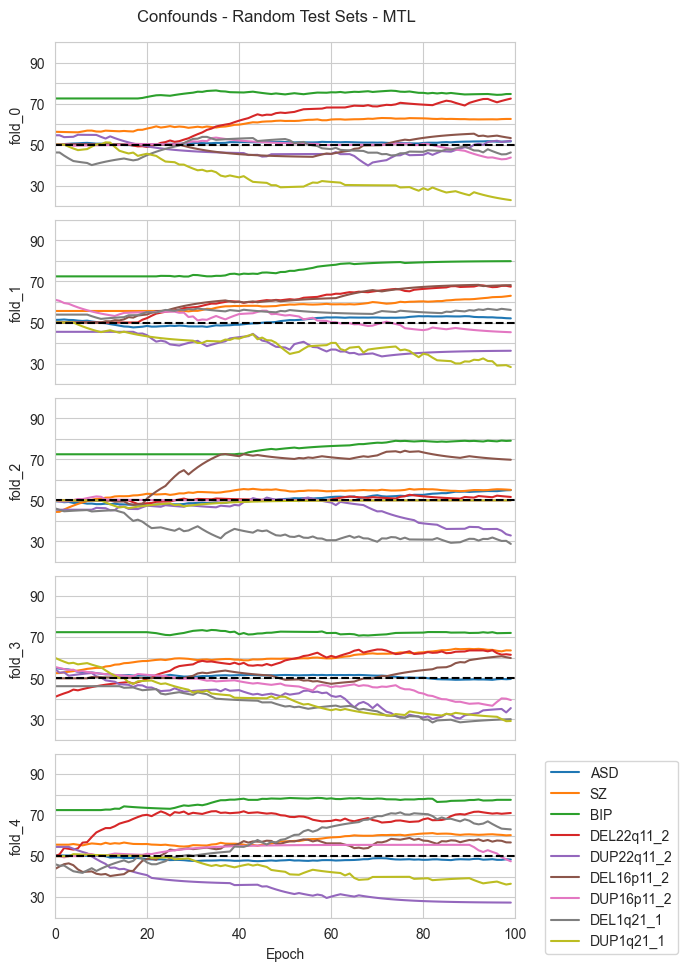

In [12]:
# TABLE PLOTS
fig,ax = plt.subplots(5,1,figsize=(7,10),sharex=True)
for j,df in enumerate(folds_conf):
    plt.ylim(35,100)
    plt.xlim(0,100)
    for case in cases:
        sns.lineplot(x=df.index,y=smooth(df[case]['Accuracy/test']),data=df[case],label=case,ax=ax[j])
    ax[j].set_ylabel(f'fold_{j}')
    ax[j].set_xlim(0,100)
    ax[j].set_ylim(20,100)
    ax[j].set_yticks([20,30,40,50,60,70,80,90,100])
    ax[j].set_yticklabels([None,30,None,50,None,70,None,90,None])
    ax[j].axhline(50,-5,105,ls='--',color='black')

    if j == 4:
        ax[j].set_xlabel('Epoch')
        sns.move_legend(ax[j], "upper left", bbox_to_anchor=(1.05, 1))
    else:
        ax[j].get_legend().remove()
plt.suptitle('Confounds - Random Test Sets - MTL',x=0.4,y=0.99)
plt.tight_layout(pad=1)
plt.savefig(os.path.join(p_out_parent,f'confounds/figures/MTL_training.png'),dpi=300)
plt.show()

# MLP - CONNECTOMES
## Single Task

In [13]:
res_single_conn = {}
for case in cases:
    p = os.path.join(p_parent,'connectomes',f'{case}')
    folds = []
    for i in range(5):
        p_fold = os.path.join(p,f'fold_{i}')
        file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])[case]
        folds.append(df)
    res_single_conn[case] = folds

In [14]:
# INDIVIDUAL PLOTS
"""
for case in res_single_conn:
    fig,ax = plt.subplots(figsize=(10,3))
    for i,df in enumerate(res_single_conn[case]):
        sns.lineplot(x=df.index,y=smooth(df['Accuracy/test']),data=df,label=f'fold_{i}')
    plt.ylim(35,100)
    plt.xlim(0,100)
    plt.title(f'{case} - Connectomes - Random Test Sets')
    plt.legend(loc="upper left")
    plt.hlines(50,-5,105,ls='--',color='black')
    plt.tight_layout()
    plt.savefig(os.path.join(p_out_parent,f'connectomes/figures/{case}.png'),dpi=300)
    plt.show()
"""

'\nfor case in res_single_conn:\n    fig,ax = plt.subplots(figsize=(10,3))\n    for i,df in enumerate(res_single_conn[case]):\n        sns.lineplot(x=df.index,y=smooth(df[\'Accuracy/test\']),data=df,label=f\'fold_{i}\')\n    plt.ylim(35,100)\n    plt.xlim(0,100)\n    plt.title(f\'{case} - Connectomes - Random Test Sets\')\n    plt.legend(loc="upper left")\n    plt.hlines(50,-5,105,ls=\'--\',color=\'black\')\n    plt.tight_layout()\n    plt.savefig(os.path.join(p_out_parent,f\'connectomes/figures/{case}.png\'),dpi=300)\n    plt.show()\n'

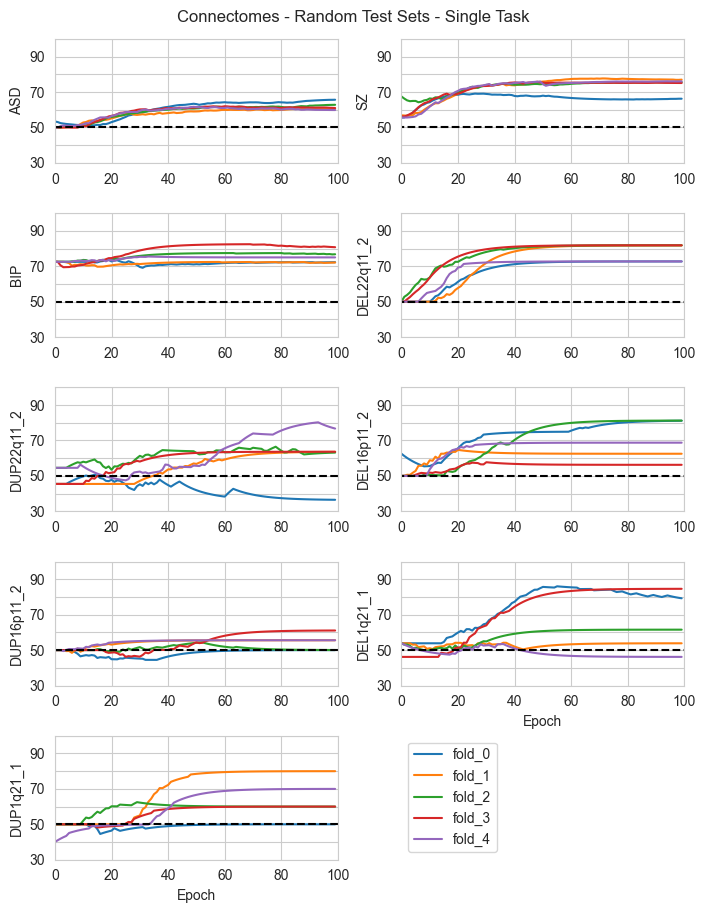

In [15]:
# TABLE PLOTS
fig,ax = plt.subplots(5,2,figsize=(7,9))
tuples = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1),(3,0),(3,1),(4,0)]
for j,case in enumerate(res_single_conn):
    for i,df in enumerate(res_single_conn[case]):
        sns.lineplot(x=df.index,y=smooth(df['Accuracy/test']),data=df,label=f'fold_{i}',ax=ax[tuples[j]])
    if j==0: 
        h, l = ax[tuples[j]].get_legend_handles_labels()
    ax[tuples[j]].get_legend().remove()
    ax[tuples[j]].set_ylabel(f'{case}')
    ax[tuples[j]].set_xlim(0,100)
    ax[tuples[j]].set_ylim(35,100)
    ax[tuples[j]].set_yticks([30,40,50,60,70,80,90,100])
    ax[tuples[j]].set_yticklabels([30,None,50,None,70,None,90,None])
    ax[tuples[j]].axhline(50,-5,105,ls='--',color='black')

    if (j == 8) | (j == 7):
        ax[tuples[j]].set_xlabel('Epoch')

ax[-1, -1].axis('off')
ax[-1,-1].legend(h, l,loc="upper left")
plt.suptitle('Connectomes - Random Test Sets - Single Task',y=1)
plt.tight_layout(pad=0.5)
plt.savefig(os.path.join(p_out_parent,f'connectomes/figures/ST_training.png'),dpi=300)
plt.show()

## Multi-Task

In [16]:
n_folds = 5

p = os.path.join(p_parent,'connectomes/all')
folds_conn = []
for i in range(n_folds):
    p_fold = os.path.join(p,f'fold_{i}')
    file = [f for f in os.listdir(p_fold) if f[-4:]=='.csv'][0]
    df = pd.read_csv(os.path.join(p,f'fold_{i}',file),index_col=0,header=[0,1])
    folds_conn.append(df)

In [17]:
# INDIVIDUAL PLOTS
"""
for i,df in enumerate(folds_conn):
    fig,ax = plt.subplots(figsize=(10,4))
    for case in cases:
        sns.lineplot(x=df.index,y=smooth(df[case]['Accuracy/test']),data=df[case],label=case)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Multi-Task - Connectomes - Random Test Sets - Fold {i}')

    plt.xlim(0,100)
    plt.ylim(25,100)
    plt.hlines(50,-5,105,ls='--',color='black')
    plt.tight_layout()
    plt.savefig(os.path.join(p_out_parent,f'connectomes/figures/all_fold{i}.png'))
    plt.show()
"""

'\nfor i,df in enumerate(folds_conn):\n    fig,ax = plt.subplots(figsize=(10,4))\n    for case in cases:\n        sns.lineplot(x=df.index,y=smooth(df[case][\'Accuracy/test\']),data=df[case],label=case)\n    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))\n    plt.title(f\'Multi-Task - Connectomes - Random Test Sets - Fold {i}\')\n\n    plt.xlim(0,100)\n    plt.ylim(25,100)\n    plt.hlines(50,-5,105,ls=\'--\',color=\'black\')\n    plt.tight_layout()\n    plt.savefig(os.path.join(p_out_parent,f\'connectomes/figures/all_fold{i}.png\'))\n    plt.show()\n'

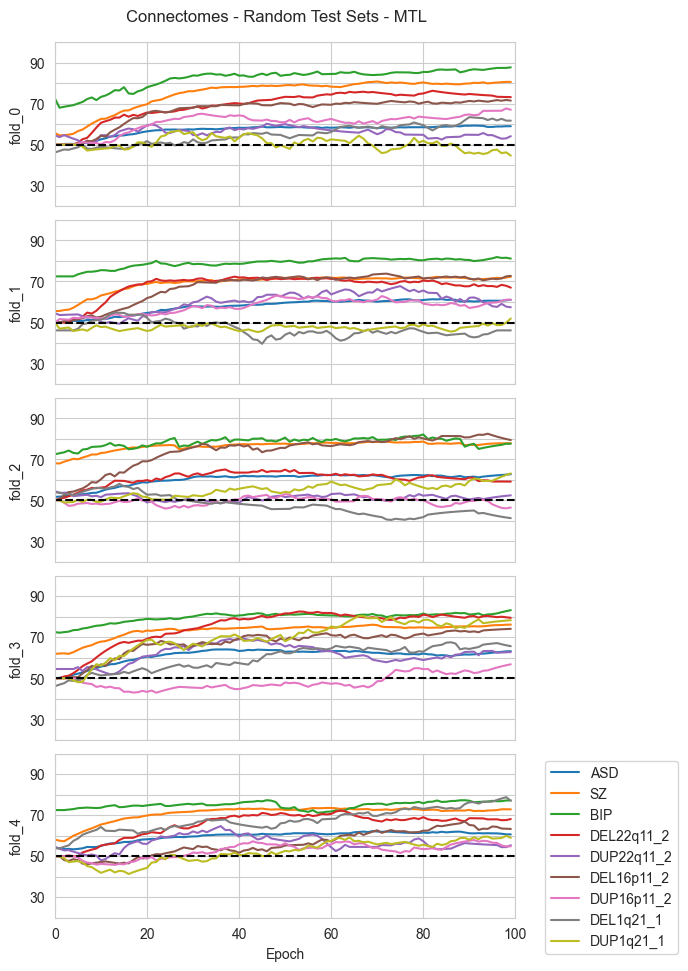

In [18]:
# TABLE PLOTS
fig,ax = plt.subplots(5,1,figsize=(7,10),sharex=True)
for j,df in enumerate(folds_conn):
    plt.ylim(25,100)
    plt.xlim(0,100)
    for case in cases:
        sns.lineplot(x=df.index,y=smooth(df[case]['Accuracy/test']),data=df[case],label=case,ax=ax[j])
    ax[j].set_ylabel(f'fold_{j}')
    ax[j].set_xlim(0,100)
    ax[j].set_ylim(35,100)
    ax[j].set_yticks([20,30,40,50,60,70,80,90,100])
    ax[j].set_yticklabels([None,30,None,50,None,70,None,90,None])
    ax[j].axhline(50,-5,105,ls='--',color='black')

    if j == 4:
        ax[j].set_xlabel('Epoch')
        sns.move_legend(ax[j], "upper left", bbox_to_anchor=(1.05, 1))
    else:
        ax[j].get_legend().remove()
plt.suptitle('Connectomes - Random Test Sets - MTL',x=0.4,y=0.99)
plt.tight_layout(pad=1)
plt.savefig(os.path.join(p_out_parent,f'connectomes/figures/MTL_training.png'),dpi=300)
plt.show()